# Heart Disease Prediction Model

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Import libraries

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, I will use the `sklearn` library.


### Data Overview
Taken data from facebook's recruting challenge on kaggle 
data contains two columns source and destination eac edge in graph 
    - Data columns (total 13 columns):  
    
  
### Performance metric for supervised learning:  
- Both precision and recall is important 
- Confusion matrix



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [2]:
dataset=pd.read_csv('../input/heart-disease-uci/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset is now loaded into the variable `dataset`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [4]:
dataset.describe()
#print(dataset['sex'].head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

# Exploratory Data Analysis

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

In [5]:
print('~> Have not heart disease (target = 0):\n   {}%'.format(100 - round(dataset['target'].mean()*100, 2)))
print('\n~> Have heart disease (target= 1):\n   {}%'.format(round(dataset['target'].mean()*100, 2)))

~> Have not heart disease (target = 0):
   45.54%

~> Have heart disease (target= 1):
   54.46%


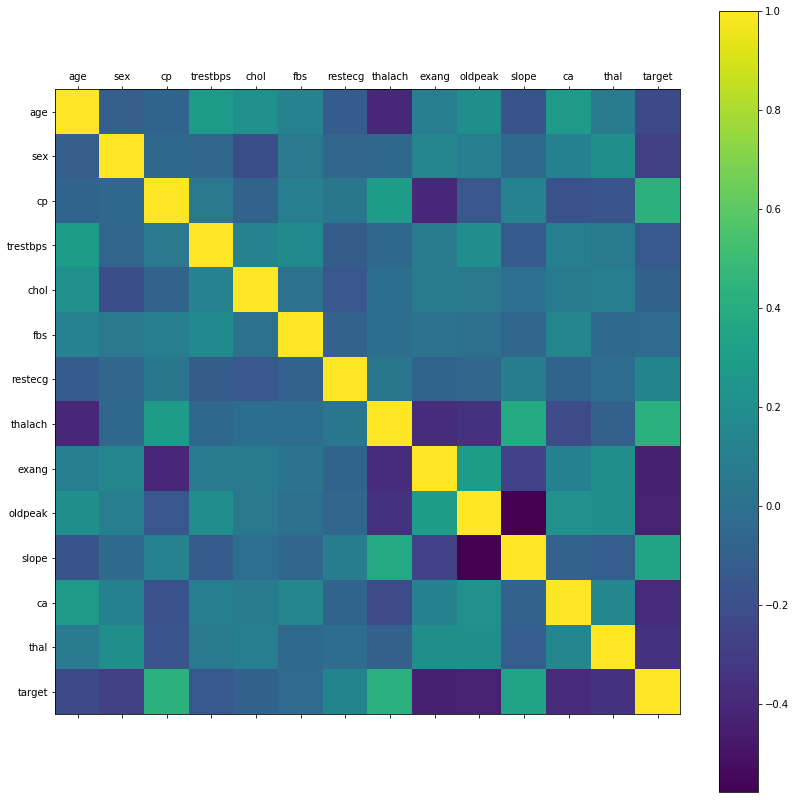

In [6]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

<Figure size 432x432 with 0 Axes>

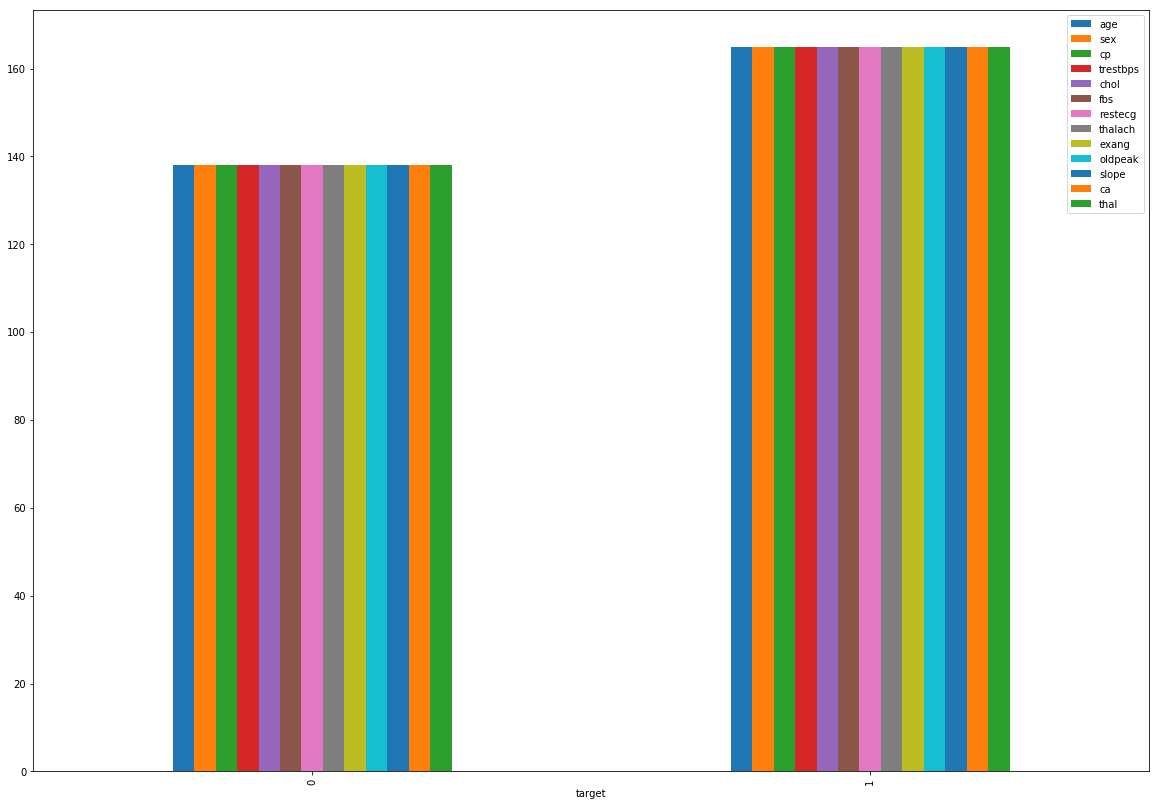

In [7]:
plt.figure(figsize=(6,6))
dataset.groupby("target").count().plot.bar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4c0c862e8>,
      dtype=object)

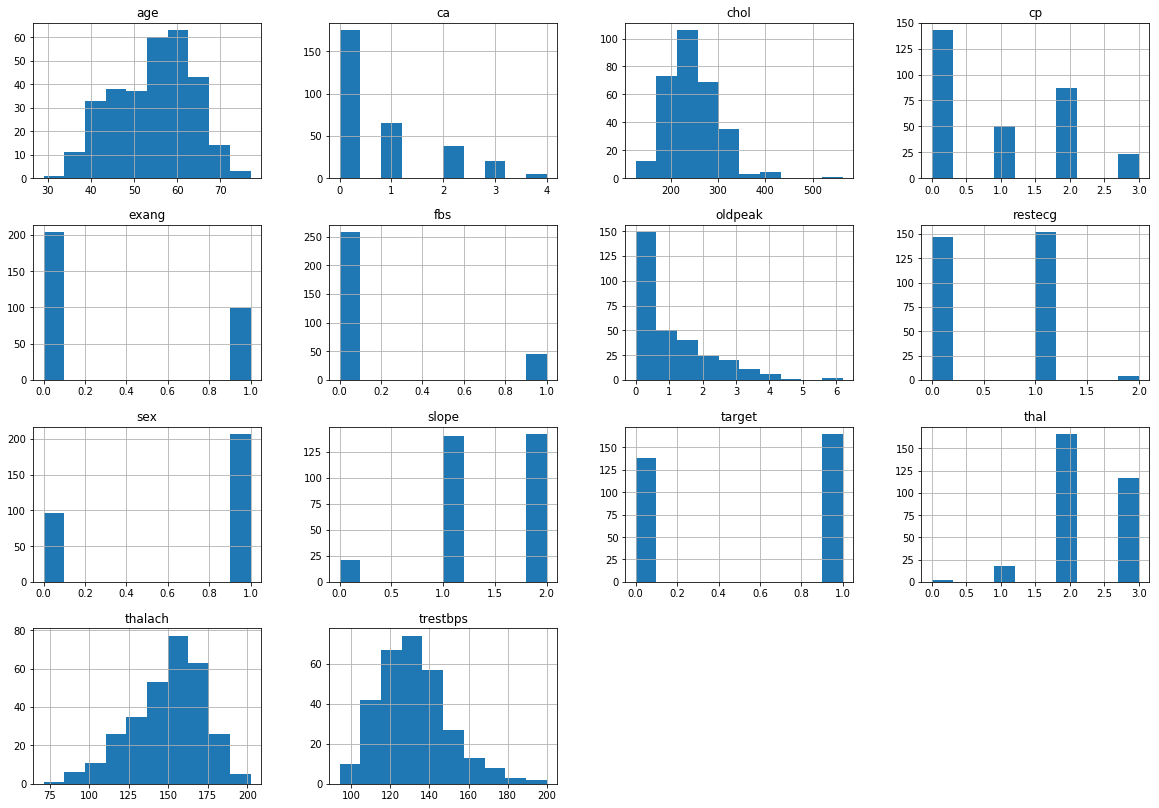

In [8]:
dataset.hist()

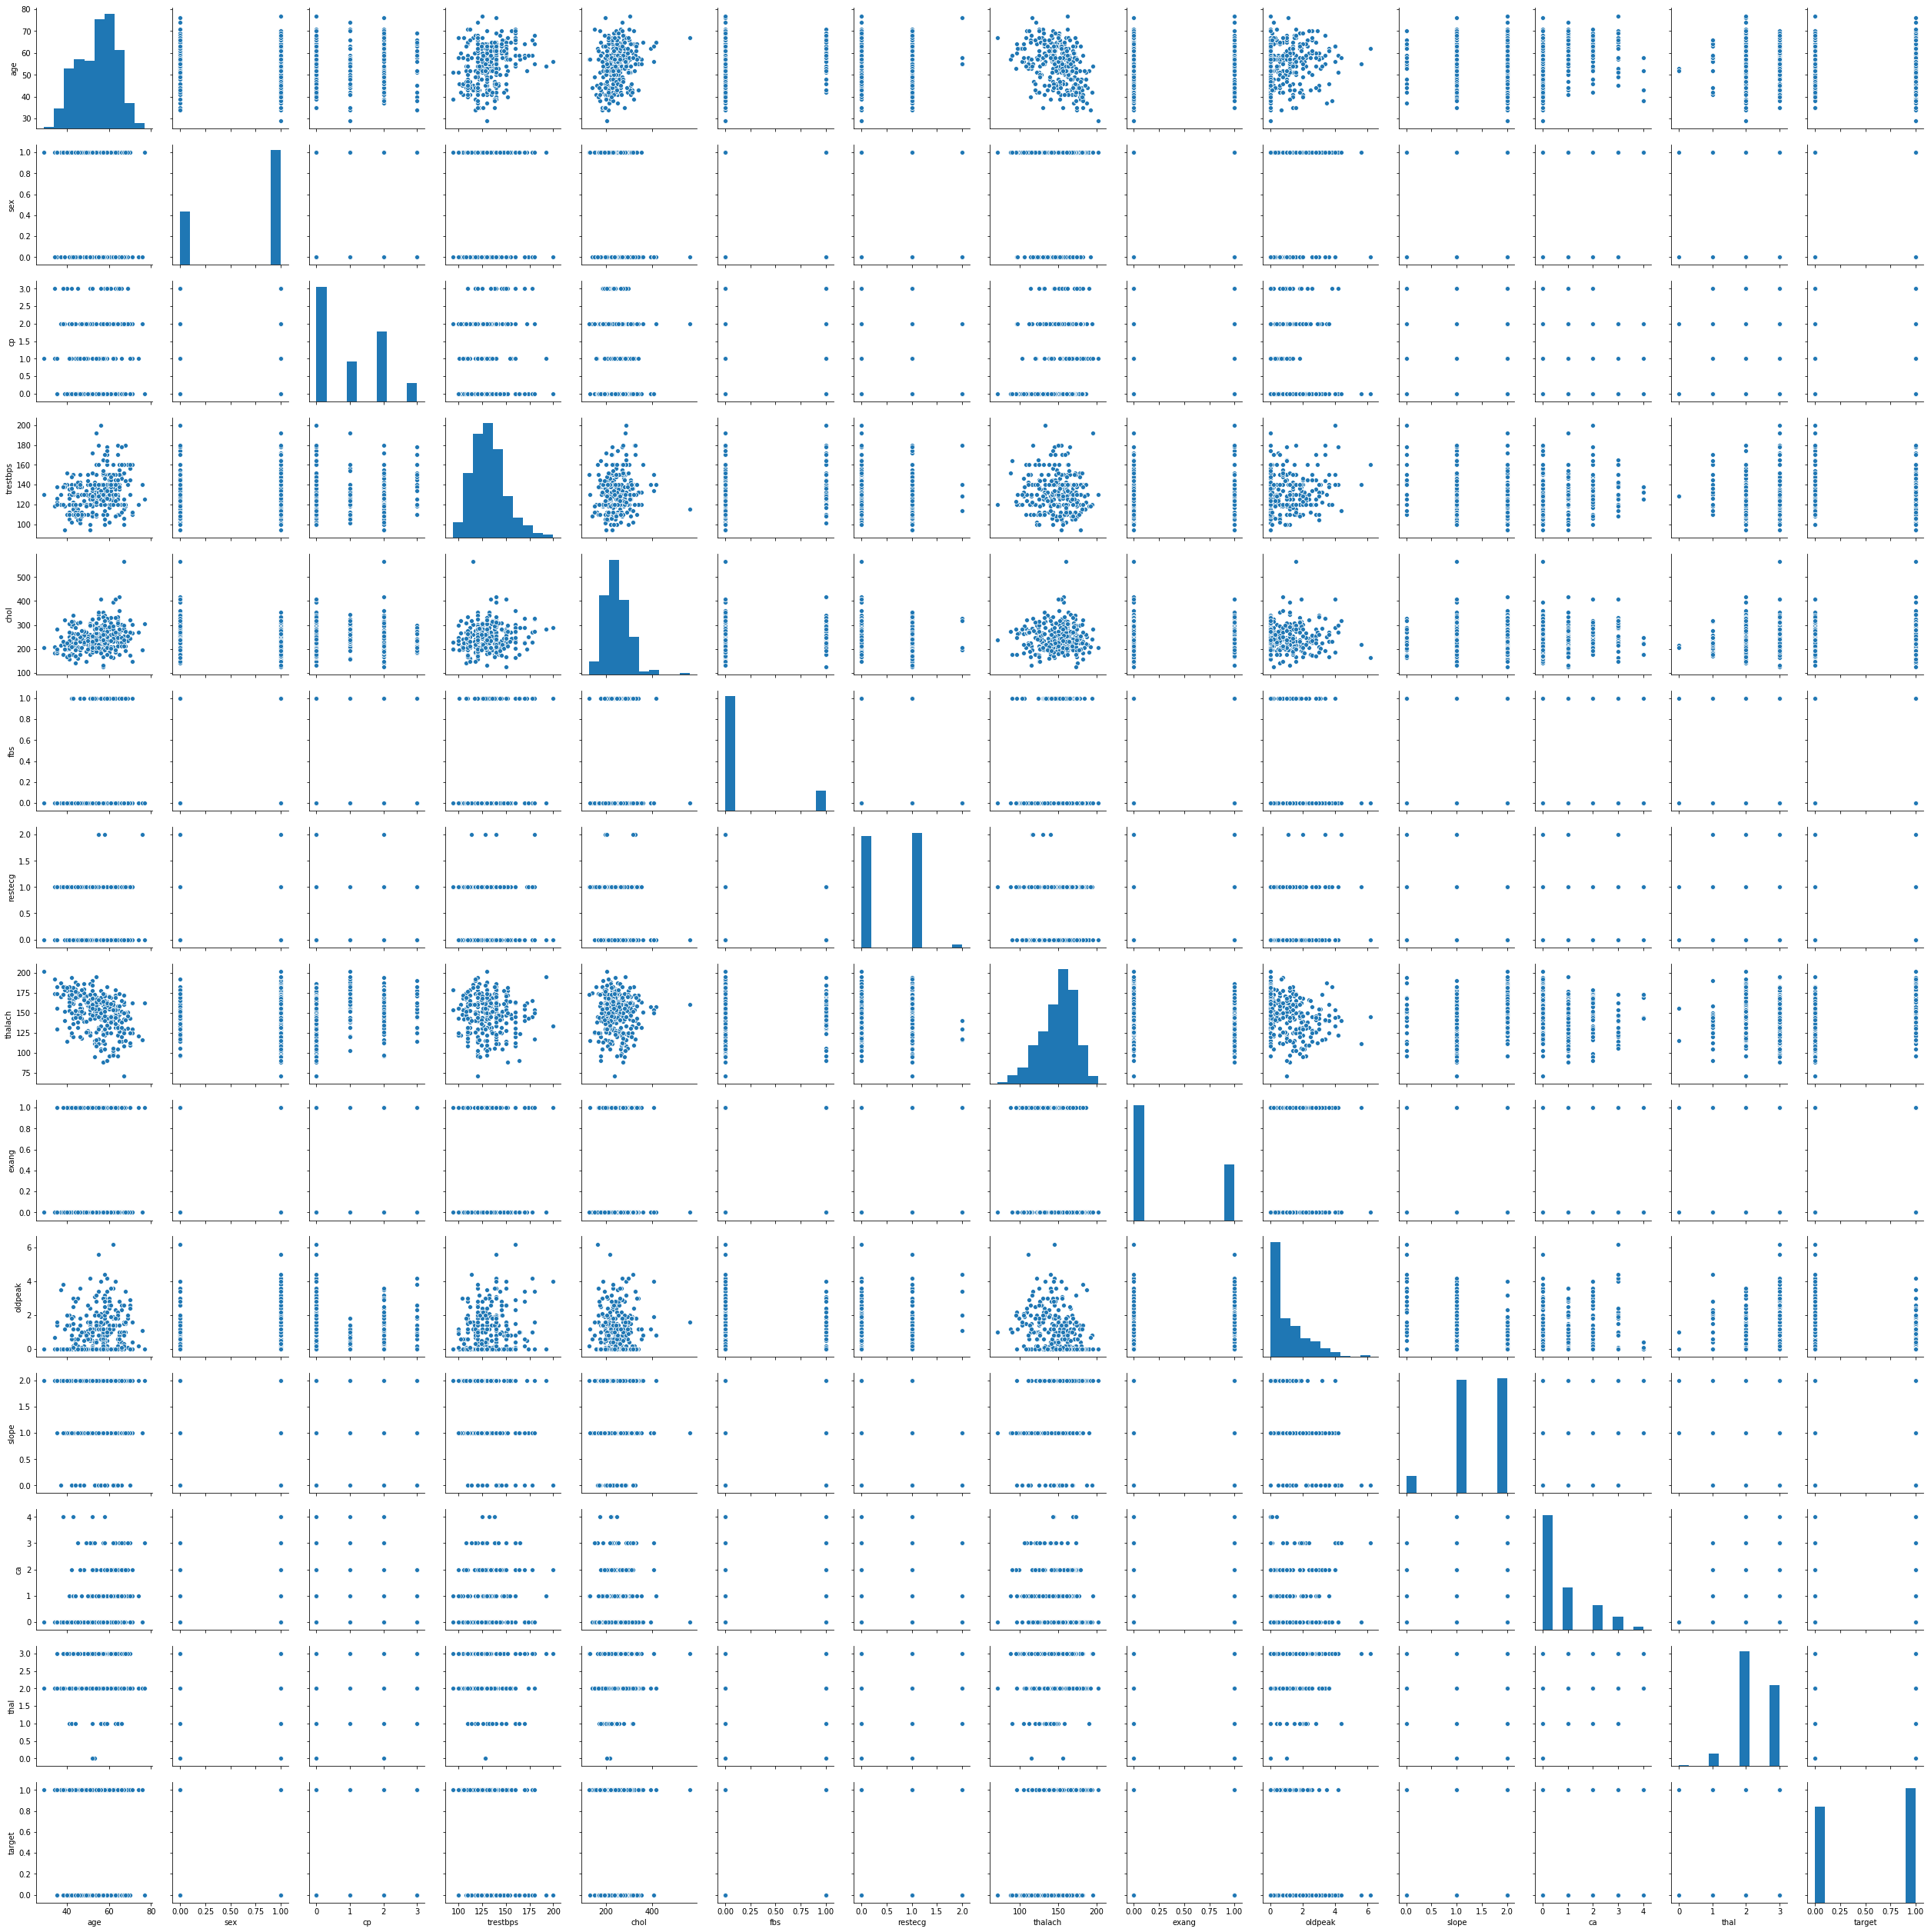

In [9]:
import seaborn as sns
sns.pairplot(dataset, palette='rainbow')

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

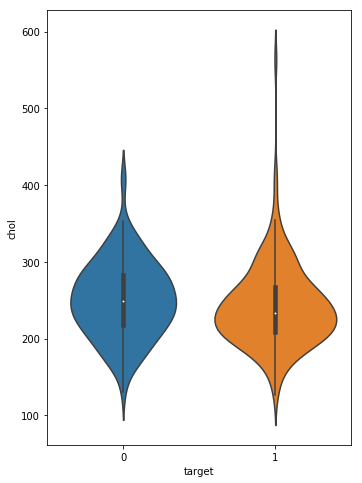

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'chol', data = dataset[0:])
plt.show()

**Univarirate Analysis of chol feature**<br/>
same can be done for few more features

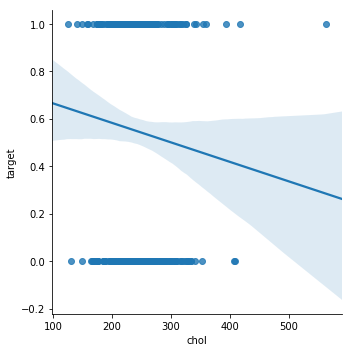

In [11]:
sns.lmplot(x='chol',y='target',data=dataset)

Number of Unique chol: 152
234    6
204    6
197    6
269    5
212    5
254    5
226    4
243    4
240    4
239    4
Name: chol, dtype: int64


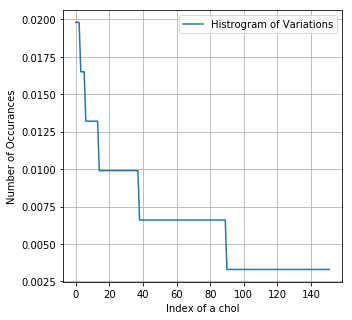

[0.01980198 0.03960396 0.05940594 0.07590759 0.09240924 0.10891089
 0.12211221 0.13531353 0.14851485 0.16171617 0.17491749 0.18811881
 0.20132013 0.21452145 0.22442244 0.23432343 0.24422442 0.25412541
 0.2640264  0.27392739 0.28382838 0.29372937 0.30363036 0.31353135
 0.32343234 0.33333333 0.34323432 0.35313531 0.3630363  0.37293729
 0.38283828 0.39273927 0.40264026 0.41254125 0.42244224 0.43234323
 0.44224422 0.45214521 0.45874587 0.46534653 0.47194719 0.47854785
 0.48514851 0.49174917 0.49834983 0.5049505  0.51155116 0.51815182
 0.52475248 0.53135314 0.5379538  0.54455446 0.55115512 0.55775578
 0.56435644 0.5709571  0.57755776 0.58415842 0.59075908 0.59735974
 0.6039604  0.61056106 0.61716172 0.62376238 0.63036304 0.6369637
 0.64356436 0.65016502 0.65676568 0.66336634 0.669967   0.67656766
 0.68316832 0.68976898 0.69636964 0.7029703  0.70957096 0.71617162
 0.72277228 0.72937294 0.7359736  0.74257426 0.74917492 0.75577558
 0.76237624 0.7689769  0.77557756 0.78217822 0.78877888 0.79537

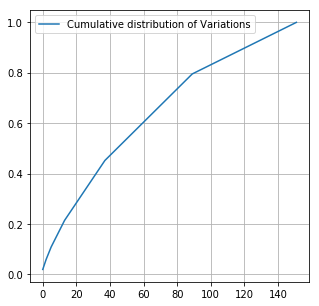

In [12]:
plt.figure(figsize=(5, 5))
unique_variations = dataset['chol'].value_counts()
print('Number of Unique chol:', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a chol')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
print(c)
plt.figure(figsize=(5, 5))
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Count of each Target Class')

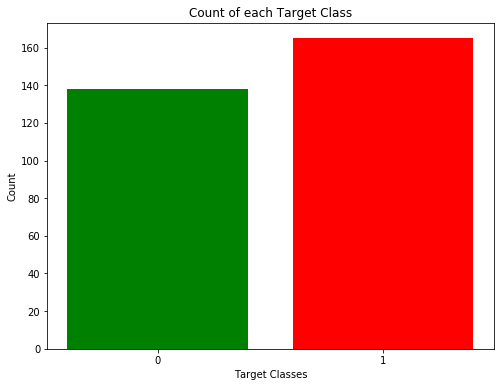

In [13]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [14]:
nan_rows = dataset[dataset.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [15]:
categorical_feature_mask = dataset.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = dataset.columns[categorical_feature_mask].tolist()
print(categorical_cols)
print("number of categorical features ",len(categorical_cols))

[]
number of categorical features  0


Since we cannot find categorical features by code then we have to select manually like this



Now, I will use the `StandardScaler` from `sklearn` to scale my dataset.

In [16]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

# Machine Learning Model

I'll now import `train_test_split` to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [17]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# Performance metrics
**Confusion,**
**Recall,**
**Precision**

In [18]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    B =(C/C.sum(axis=0))
  
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [19]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

I have the scores for different neighbor values in the array `knn_scores`. I'll now plot it and see for which value of K did I get the best scores.

The log loss is: 0.4194913074929284
100


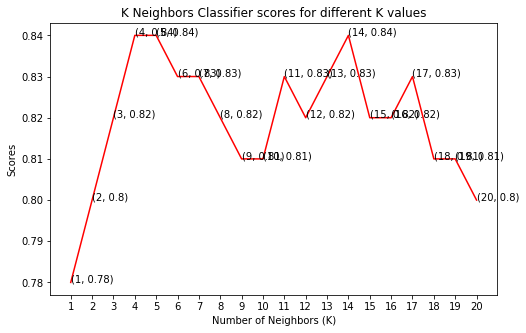

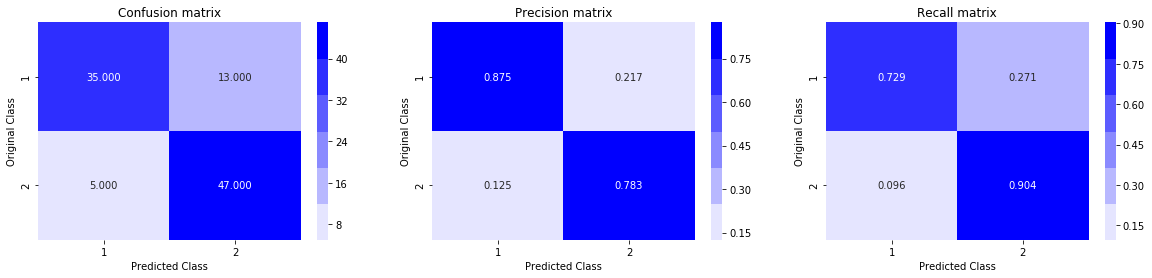

In [20]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
plt.figure(figsize=(8,5))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

#############we get k best value that is 8
#now again train our model
clf=KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))



From the plot above, it is clear that the maximum score achieved was `0.87` for the 8 neighbors.

#### Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [21]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.

The log loss is: 0.4152790470358795
100


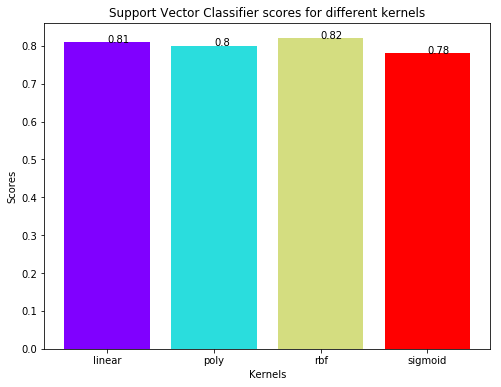

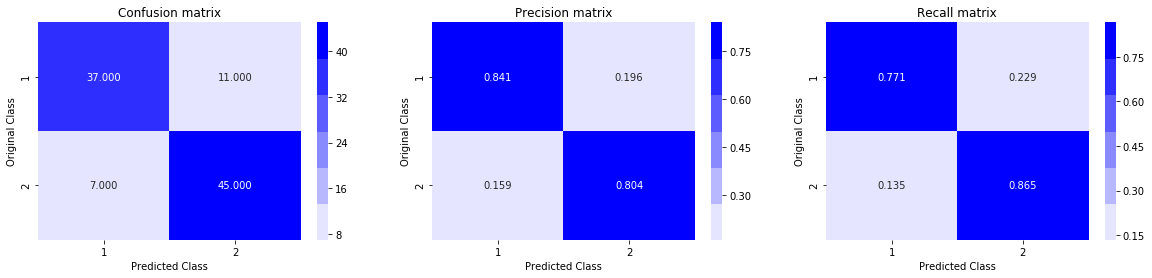

In [22]:

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
##################### with best kernel 


clf=SVC(kernel ='linear')
#clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))

The `linear` kernel performed the best, being slightly better than `rbf` kernel.

#### Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of `max_features` and see which returns the best accuracy.

In [23]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

The log loss is: 0.5341998825924514
100


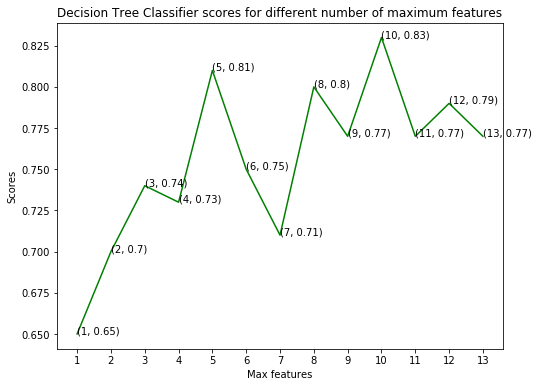

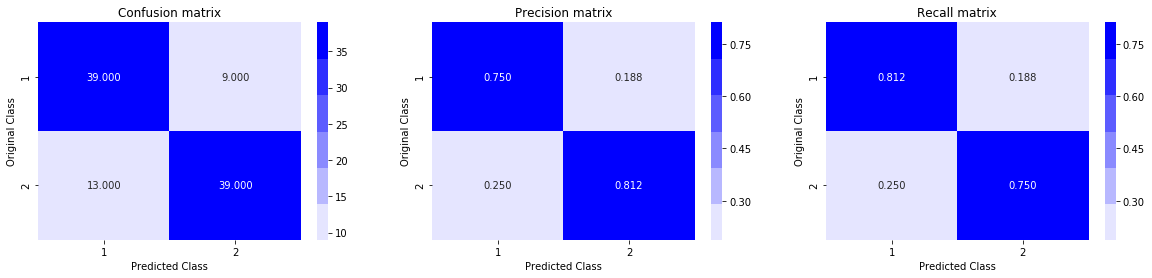

In [24]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

clf=DecisionTreeClassifier(max_features = 10, random_state = 0)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))

The model achieved the best accuracy at three values of maximum features, `2`, `4` and `18`.

#### Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [25]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

The log loss is: 0.39348441062524186
100


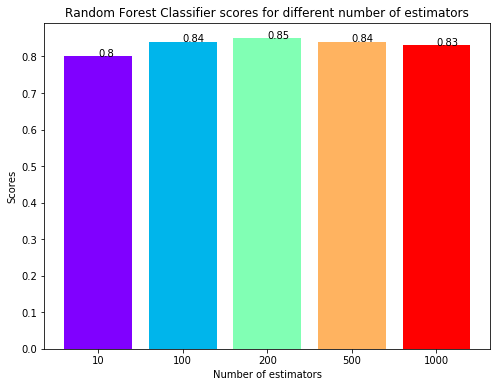

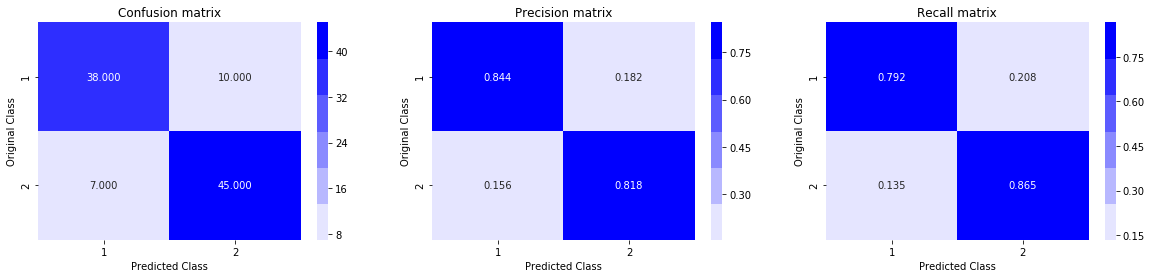

In [26]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

clf=RandomForestClassifier(n_estimators = 500, random_state = 0)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))


#### XGBOOST

Now, I'll use the ensemble method, XGBOOST , to create the model and vary the number of estimators to see their effect.

[0]	train-logloss:0.681559	valid-logloss:0.684108
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.585605	valid-logloss:0.60957
[20]	train-logloss:0.512725	valid-logloss:0.557567
[30]	train-logloss:0.455003	valid-logloss:0.519062
[40]	train-logloss:0.407503	valid-logloss:0.49514
[50]	train-logloss:0.368371	valid-logloss:0.478558
[60]	train-logloss:0.336583	valid-logloss:0.466736
[70]	train-logloss:0.308998	valid-logloss:0.460353
[80]	train-logloss:0.285831	valid-logloss:0.453601
[90]	train-logloss:0.265688	valid-logloss:0.448218
[100]	train-logloss:0.248369	valid-logloss:0.441384
[110]	train-logloss:0.233118	valid-logloss:0.438462
[120]	train-logloss:0.219548	valid-logloss:0.43408
[130]	train-logloss:0.208009	valid-logloss:0.434458
[140]	train-logloss:0.197807	valid-logloss:0.43351
[150]	train-logloss:0.189129	valid-logloss:0.43454
Stopping. Best iteration:
[134]	t

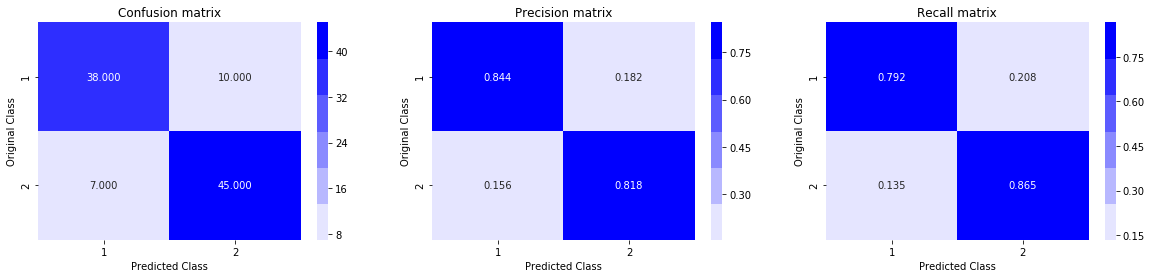

In [27]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

print(len(predict_y))
#print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))

#### Logistic Regression

Now, I'll use the ensemble method, Logistic Regression , to create the model and vary the number of estimators to see their effect.

For values of alpha =  1e-05 The log loss is: 0.44012529267994355
For values of alpha =  0.0001 The log loss is: 0.42826340471379937
For values of alpha =  0.001 The log loss is: 0.4560308526539795
For values of alpha =  0.01 The log loss is: 0.41489190299443834
For values of alpha =  0.1 The log loss is: 0.40163904302879466
For values of alpha =  1 The log loss is: 0.40556761746085845
For values of alpha =  10 The log loss is: 0.4124918369135891


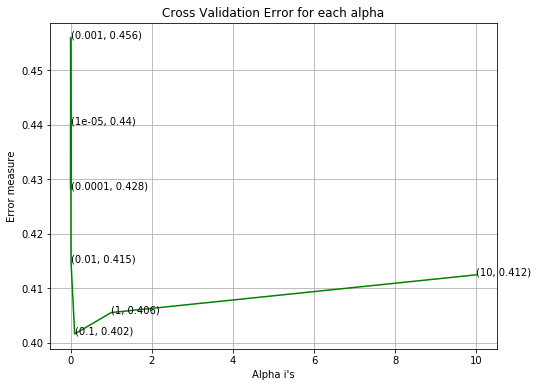

For values of best alpha =  0.1 The train log loss is: 0.37686236801831313
For values of best alpha =  0.1 The test log loss is: 0.40163904302879466
Total number of data points : 100


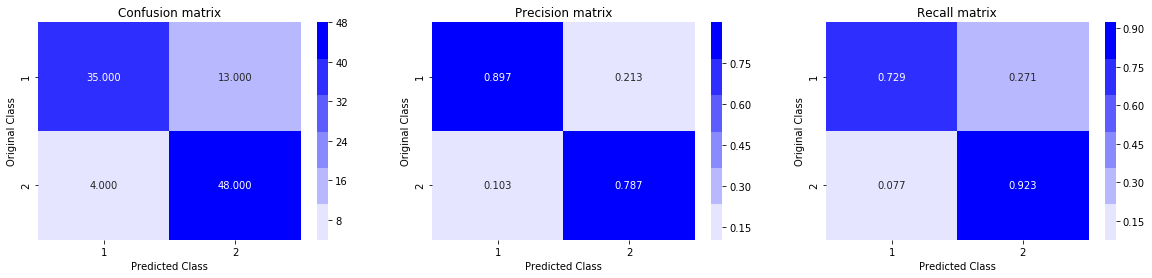

In [28]:

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.



log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Feature Importance

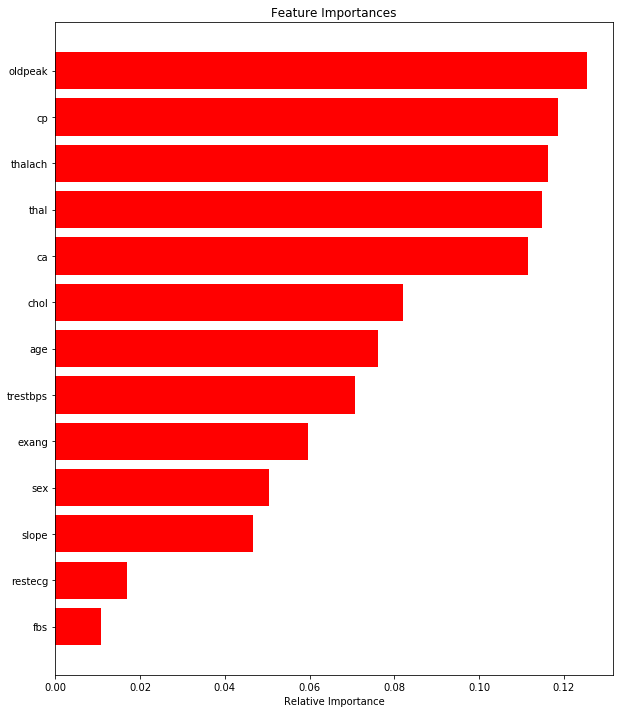

In [29]:
clf=RandomForestClassifier(n_estimators = 500, random_state = 0)
clf.fit(X_train,y_train)
features = X_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparing Models

[0.3828 0.4158 0.3972 0.5409 0.3803 0.4135]
lowest logg loss :  0.3803
SVM


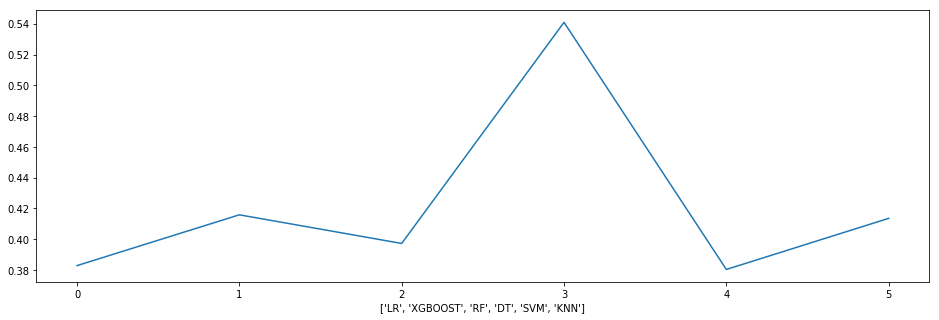

In [30]:
error_rate=np.array([0.3828,0.4158,0.3972,0.5409,0.3803,0.4135])
plt.figure(figsize=(16,5))
print(error_rate)

#plt.scatter(error_rate,range(1,7))
#seed = 7
# prepare models
models = ['LR','XGBOOST','RF','DT','SVM','KNN']
plt.xlabel(models)
plt.plot(error_rate)
lowest_loss=np.argmin(error_rate)
print("lowest logg loss : ",min(error_rate))
print(models[lowest_loss])

### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. (one hot encoding)
I then applied four Machine Learning algorithms, `K Neighbors Classifier`, `Support Vector Classifier`, `Decision Tree Classifier`,`XGBOOST`,`logistic Regression`, `Random Forest Classifier`. I varied parameters across each model to improve their scores.
In the end, `Support Vector Classifier` achieved the lowest score of log loss of `0.3803`.